# Learning goals
After today's lesson you should be understand:
  - Network modeling and analysis with NetworkX
  - Spatial network modeling and analysis with OSMnx and OpenStreetMap


Today's exercise was created by Geoff Boeing for his [Advanced Urban Analytics class](https://github.com/gboeing/ppd599). Thanks Geoff!

In [1]:
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd

# configure OSMnx
ox.settings.log_console = True


c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# anytime you're curious what package version you have, use __version__
print(nx.__version__)
print(ox.__version__)

3.2.1
1.8.1


## 1. Network analysis with NetworkX

Networks let you represent structure and interaction among the components of a system. In analytics, they let you go beyond models that average across individuals/components or treat the population/system as a monolith. Networks are useful when the system's structure is nontrivial.

A network is a set of objects (called nodes or vertices) connected to each other by a set of connections (called edges or links). A graph is a mathematical model of a network: usually used synonymously. You can represent a graph as an adjacency matrix to use the tools of linear algebra to analyze it. You can also simulate dynamics and flows on it.

A trivial (simple) network is undirected, unweighted, and lacks self-loops or parallel edges. A nontrivial (complex) network may be directed and weighted and have self-loops and parallel edges. A spatial network is a network that is spatially embedded. That means its nodes and/or edges have locations in space. A spatial network is defined by both its geometry (positions, distances, angles, etc) and its topology (connections and configurations). 

Examples:

  - street networks
  - airline routes
  - rail lines
  - capital flows
  - spread of contagious diseases

We can analyze a network in various ways. To take street networks as an example, you can measure its compactness via intersection density, its connectedness via average node degree, or the relative importance of different nodes via centrality. Betweenness centrality measures what share of all shortest paths in a network pass through each node. Closeness centrality measures the average distance between a node and all other nodes in the network.

In [3]:
# create a random small-world graph of a social network
G = nx.watts_strogatz_graph(n=100, k=5, p=0.1, seed=0)

## Here we are creating a graph with 100 nodes, each node is connected to 5 other nodes, and the probability of rewiring is 0.1
## Rewiring means that the edge between two nodes is randomly reconnected to another node


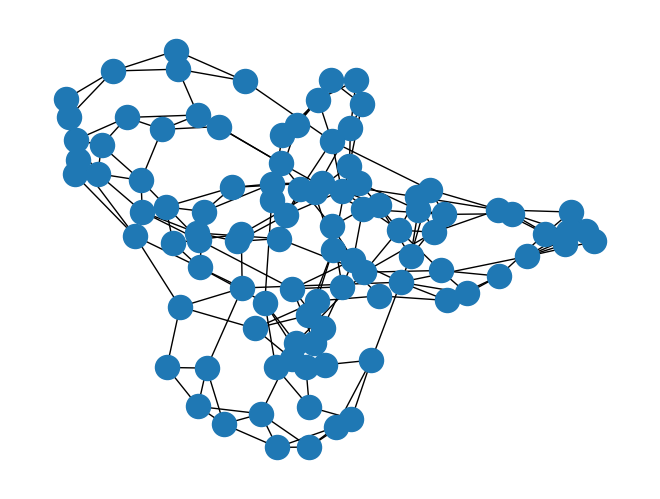

In [4]:
nx.draw(G)

In [5]:
# how many nodes and edges?
print(len(G.nodes))
print(len(G.edges))

100
200


In [6]:
# assign random ages to each person in the network
randoms = np.random.randint(low=18, high=90, size=len(G.nodes))
ages = {node:age for node, age in zip(G.nodes, randoms)}


In [7]:
ages

{0: 63,
 1: 53,
 2: 36,
 3: 30,
 4: 47,
 5: 88,
 6: 46,
 7: 81,
 8: 73,
 9: 67,
 10: 49,
 11: 49,
 12: 82,
 13: 48,
 14: 84,
 15: 76,
 16: 66,
 17: 69,
 18: 50,
 19: 85,
 20: 37,
 21: 42,
 22: 86,
 23: 68,
 24: 62,
 25: 89,
 26: 29,
 27: 69,
 28: 37,
 29: 37,
 30: 22,
 31: 67,
 32: 43,
 33: 48,
 34: 57,
 35: 86,
 36: 41,
 37: 28,
 38: 79,
 39: 54,
 40: 69,
 41: 46,
 42: 30,
 43: 65,
 44: 71,
 45: 46,
 46: 59,
 47: 42,
 48: 26,
 49: 85,
 50: 39,
 51: 81,
 52: 48,
 53: 57,
 54: 68,
 55: 20,
 56: 70,
 57: 22,
 58: 77,
 59: 51,
 60: 77,
 61: 87,
 62: 29,
 63: 85,
 64: 54,
 65: 24,
 66: 28,
 67: 25,
 68: 61,
 69: 87,
 70: 22,
 71: 81,
 72: 71,
 73: 44,
 74: 86,
 75: 43,
 76: 82,
 77: 37,
 78: 64,
 79: 22,
 80: 39,
 81: 20,
 82: 85,
 83: 84,
 84: 87,
 85: 19,
 86: 71,
 87: 33,
 88: 37,
 89: 49,
 90: 21,
 91: 65,
 92: 47,
 93: 83,
 94: 57,
 95: 64,
 96: 51,
 97: 75,
 98: 40,
 99: 68}

In [8]:
nx.set_node_attributes(G, values=ages, name='age')

`

In [9]:
# assign random "social distance" to each edge in the network
# social distance is the inverse of how often they hang out each year
hangout_counts = np.random.randint(low=1, high=100, size=len(G.edges))
distances = {edge: 1 / hangout_count for edge, hangout_count in zip(G.edges, hangout_counts)}


In [10]:
distances

{(0, 1): 0.011111111111111112,
 (0, 99): 0.125,
 (0, 2): 0.025,
 (0, 98): 0.027777777777777776,
 (1, 2): 0.015151515151515152,
 (1, 3): 0.016666666666666666,
 (1, 99): 0.010416666666666666,
 (2, 3): 0.02702702702702703,
 (2, 4): 0.01098901098901099,
 (2, 17): 0.0196078431372549,
 (3, 4): 0.013157894736842105,
 (3, 5): 0.025,
 (4, 5): 0.16666666666666666,
 (4, 6): 0.125,
 (4, 92): 0.017857142857142856,
 (5, 6): 0.011494252873563218,
 (5, 7): 0.018867924528301886,
 (6, 7): 0.012987012987012988,
 (6, 73): 0.16666666666666666,
 (7, 8): 0.08333333333333333,
 (7, 9): 0.14285714285714285,
 (8, 9): 0.14285714285714285,
 (8, 10): 0.011627906976744186,
 (9, 10): 0.02564102564102564,
 (9, 11): 0.015873015873015872,
 (9, 27): 0.017241379310344827,
 (10, 11): 0.022727272727272728,
 (10, 15): 0.012345679012345678,
 (11, 12): 0.034482758620689655,
 (11, 13): 0.02702702702702703,
 (12, 13): 0.02564102564102564,
 (12, 14): 0.125,
 (12, 32): 0.011764705882352941,
 (13, 14): 0.011904761904761904,
 (13, 1

In [11]:
nx.set_edge_attributes(G, values=distances, name='distance')

In [12]:
# view the nodes and optionally show their attribute data
G.nodes#(data=True)

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [13]:
# view the edges and optionally show their attribute data
# these are undirected edges, and there cannot be parallel edges
G.edges#(data=True)

EdgeView([(0, 1), (0, 99), (0, 2), (0, 98), (1, 2), (1, 3), (1, 99), (2, 3), (2, 4), (2, 17), (3, 4), (3, 5), (4, 5), (4, 6), (4, 92), (5, 6), (5, 7), (6, 7), (6, 73), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10), (9, 11), (9, 27), (10, 11), (10, 15), (11, 12), (11, 13), (12, 13), (12, 14), (12, 32), (13, 14), (13, 15), (14, 15), (14, 16), (15, 16), (15, 17), (16, 17), (16, 18), (17, 18), (18, 19), (18, 20), (19, 20), (19, 21), (20, 21), (20, 22), (20, 87), (21, 22), (21, 23), (22, 23), (22, 24), (23, 24), (23, 86), (24, 25), (24, 54), (24, 74), (25, 26), (25, 27), (26, 27), (26, 28), (27, 28), (28, 29), (28, 30), (29, 30), (29, 31), (30, 31), (30, 32), (31, 32), (31, 33), (32, 33), (33, 34), (33, 35), (34, 35), (34, 36), (34, 97), (35, 37), (35, 92), (35, 61), (36, 37), (36, 38), (37, 38), (37, 39), (38, 39), (38, 40), (39, 40), (39, 41), (40, 41), (40, 42), (40, 50), (41, 42), (41, 43), (42, 43), (42, 44), (43, 44), (43, 45), (44, 45), (44, 46), (45, 47), (45, 72), (46, 47), (46, 48), (4

In [14]:
# calculate the shortest path between two nodes
path1 = nx.shortest_path(G, source=0, target=50)
path1

[0, 2, 17, 18, 20, 87, 50]

In [15]:
# calculate the shortest weighted path between two nodes
path2 = nx.shortest_path(G, source=0, target=50, weight='distance')
path2

[0, 2, 17, 18, 20, 87, 50]

In [16]:
# calculate node betweenness centrality across the network
bc = nx.betweenness_centrality(G, weight='distance')
pd.Series(bc).describe()

count    100.000000
mean       0.052766
std        0.054117
min        0.000000
25%        0.008606
50%        0.038136
75%        0.079829
max        0.270460
dtype: float64

## Q.1

In [18]:
# now it's your turn
# try changing the social distance between our people, then recompute a shortest path

hangout_counts = np.random.randint(low=1, high=100, size=len(G.edges))
distances = {edge: 1 / hangout_count for edge, hangout_count in zip(G.edges, hangout_counts)}

nx.set_edge_attributes(G, values=distances, name='distance')

path2_new = nx.shortest_path(G, source=0, target=50, weight='distance')
print(path2)
print(path2_new)

[0, 2, 17, 18, 20, 87, 50]
[0, 2, 4, 6, 73, 72, 45, 47, 48, 50]


There is nothing explicitly spatial about the graph above. Although it models people and their relationships, it captures nothing about their positions in space. Now let's look at real-world spatial networks.

## 2. Spatial networks and OSMnx

OSMnx lets you download, model, analyze, and visualize street networks (and any other spatial data) anywhere in the world from OpenStreetMap.

OSMnx is built on top of GeoPandas, NetworkX, and matplotlib and interacts with OpenStreetMap’s APIs to:

  - Download and model street networks or other networked infrastructure anywhere in the world with a single line of code
  - Download any other spatial geometries, place boundaries, building footprints, or points of interest as a GeoDataFrame
  - Download by city name, polygon, bounding box, or point/address + network distance
  - Download drivable, walkable, bikeable, or all street networks
  - Download node elevations and calculate edge grades (inclines)
  - Impute missing speeds and calculate graph edge travel times
  - Simplify and correct the network’s topology to clean-up nodes and consolidate intersections
  - Fast map-matching of points, routes, or trajectories to nearest graph edges or nodes
  - Save networks to disk as shapefiles, GeoPackages, and GraphML
  - Save/load street network to/from a local .osm XML file
  - Conduct topological and spatial analyses to automatically calculate dozens of indicators
  - Calculate and visualize street bearings and orientations
  - Calculate and visualize shortest-path routes that minimize distance, travel time, elevation, etc
  - Visualize street networks as a static map or interactive Leaflet web map
  - Visualize travel distance and travel time with isoline and isochrone maps
  - Plot figure-ground diagrams of street networks and building footprints

More info:

  - [OSMnx documentation](https://osmnx.readthedocs.io)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)

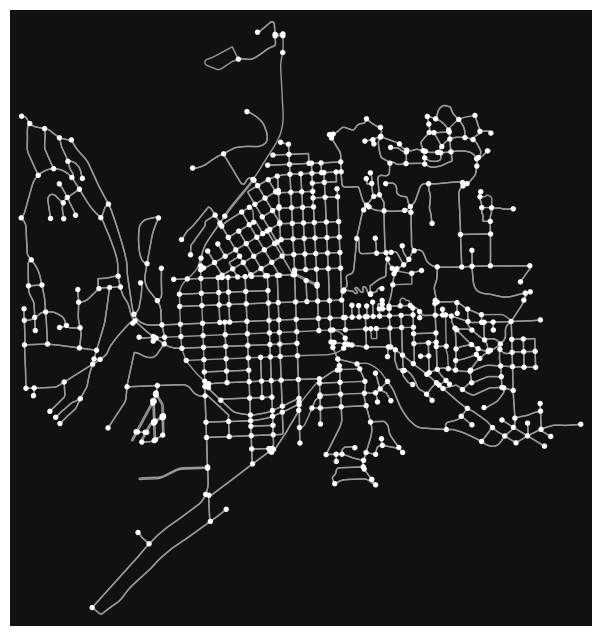

In [27]:
# download/model a street network for some city then visualize it
place = 'Ithaca, New York, USA'
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G)

OSMnx geocodes the query "Ithaca, New York, USA" to retrieve the place boundaries of that city from the Nominatim API, retrieves the drivable street network data within those boundaries from the Overpass API, constructs a graph model, then simplifies/corrects its topology such that nodes represent intersections and dead-ends and edges represent the street segments linking them.

In [20]:
# look at the first 10 nodes: these are OSM IDs
list(G.nodes)[0:10]

[213409446,
 213409480,
 213409892,
 213409894,
 213409896,
 213409899,
 213409959,
 213409964,
 213410337,
 213410339]

In [21]:
# look at the first 10 edges: u, v, key
list(G.edges)[0:10]

[(213409446, 213409480, 0),
 (213409446, 213467056, 0),
 (213409446, 213467003, 0),
 (213409480, 213409446, 0),
 (213409480, 213449564, 0),
 (213409480, 213447279, 0),
 (213409892, 213472435, 0),
 (213409892, 213515843, 0),
 (213409892, 213409894, 0),
 (213409894, 213409896, 0)]

In [22]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

OSMnx models all networks as NetworkX `MultiDiGraph` objects. You can convert to:

  - undirected NetworkX MultiGraphs
  - NetworkX DiGraphs without (possible) parallel edges
  - GeoPandas node/edge GeoDataFrames

In [23]:
# convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
213409446,42.448787,-76.518574,3,NaN,POINT (-76.51857 42.44879)
213409480,42.449783,-76.517811,3,NaN,POINT (-76.51781 42.44978)
213409892,42.444591,-76.499413,3,NaN,POINT (-76.49941 42.44459)
213409894,42.445959,-76.500512,3,NaN,POINT (-76.50051 42.44596)
213409896,42.446884,-76.501260,4,stop,POINT (-76.50126 42.44688)


In [24]:
gdf_edges.head()

osmid           name      highway  oneway  \
u         v         key                                                  
213409446 213409480 0     20181025   Vinegar Hill  residential   False   
          213467056 0    345317460  Hector Street      primary   False   
          213467003 0    345317460  Hector Street      primary   False   
213409480 213409446 0     20181025   Vinegar Hill  residential   False   
          213449564 0     20187426   Cliff Street      primary   False   

                        reversed   length  \
u         v         key                     
213409446 213409480 0      False  130.393   
          213467056 0      False  504.350   
          213467003 0       True  292.613   
213409480 213409446 0       True  130.393   
          213449564 0      False  609.383   

                                                                  geometry  \
u         v         key                                                      
213409446 213409480 0    LINESTRING (-76.51857 42.44879, -76.51854 42.4...   
          213467056 0    LINESTRING (-76.51857 42.44879, -76.51851 42.4...   
          213467003 0    LINESTRING (-76.51857 42.44879, -76.51873 42.4...   
213409480 213409446 0    LINESTRING (-76.51781 42.44978, -76.51798 42.4...   
          213449564 0    LINESTRING (-76.51781 42.44978, -76.51851 42.4...   

                           ref maxspeed lanes bridge access junction  
u         v         key                                               
213409446 213409480 0      NaN      NaN   NaN    NaN    NaN      NaN  
          213467056 0    NY 79   30 mph   NaN    NaN    NaN      NaN  
          213467003 0    NY 79   30 mph   NaN    NaN    NaN      NaN  
213409480 213409446 0      NaN      NaN   NaN    NaN    NaN      NaN  
          213449564 0    NY 96      NaN     2    NaN    NaN      NaN

You can create a graph from node/edge GeoDataFrames, as long as gdf_nodes is indexed by osmid and gdf_edges is multi-indexed by u, v, key (following normal MultiDiGraph structure). This allows you to load graph node/edge shapefiles or GeoPackage layers as GeoDataFrames then convert to a MultiDiGraph for graph analytics.

In [25]:
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)
print(len(G2.nodes))
print(len(G2.edges))

621
1690


## Q.2 

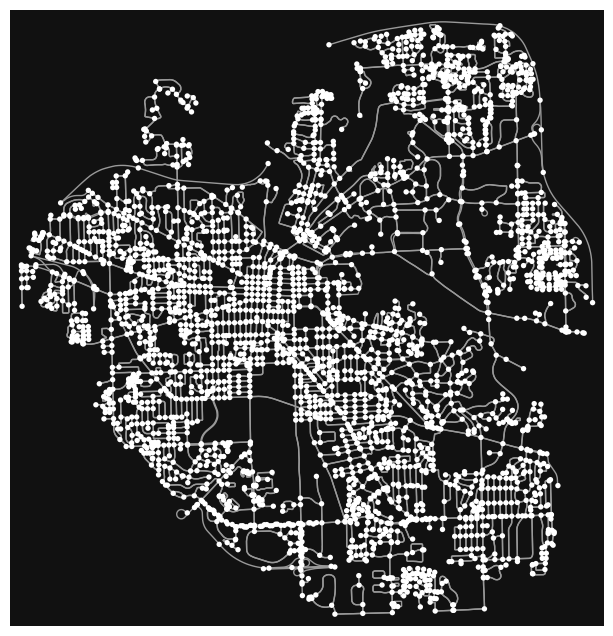

In [26]:
# now it's your turn
# download a graph of a different (small-ish) town, then plot it
place_AA = 'Ann Arbor, Michigan, USA'
G_AA = ox.graph_from_place(place_AA, network_type='drive')
fig, ax = ox.plot_graph(G_AA)

## Basic street network stats

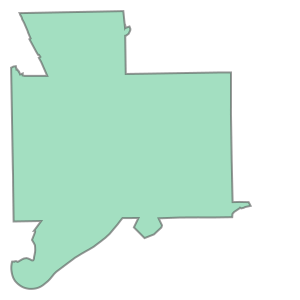

In [28]:
# get our study site's geometry
gdf = ox.geocode_to_gdf(place)
gdf_proj = ox.project_gdf(gdf)
geom_proj = gdf_proj['geometry'].iloc[0]
geom_proj

In [29]:
# what size area does our study site cover in square meters?
area_m = geom_proj.area
area_m

15745858.508834887

In [30]:
# project the graph (automatically) then check its new CRS
G_proj = ox.project_graph(G)
G_proj.graph['crs']

<Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamaica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
# show some basic stats about the (projected) network
ox.basic_stats(G_proj, area=area_m, clean_int_tol=10)

{'n': 621,
 'm': 1690,
 'k_avg': 5.442834138486313,
 'edge_length_total': 227324.6080000004,
 'edge_length_avg': 134.51160236686414,
 'streets_per_node_avg': 3.0096618357487923,
 'streets_per_node_counts': {0: 0, 1: 82, 2: 2, 3: 368, 4: 167, 5: 1, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1320450885668277,
  2: 0.00322061191626409,
  3: 0.5925925925925926,
  4: 0.2689210950080515,
  5: 0.001610305958132045,
  6: 0.001610305958132045},
 'intersection_count': 539,
 'street_length_total': 122698.14400000003,
 'street_segment_count': 915,
 'street_length_avg': 134.0963322404372,
 'circuity_avg': 1.0565395120223737,
 'self_loop_proportion': 0.003278688524590164,
 'clean_intersection_count': 484,
 'node_density_km': 39.438941970141634,
 'intersection_density_km': 34.2312233847123,
 'edge_density_km': 14437.104707402914,
 'street_density_km': 7792.407376908346,
 'clean_intersection_density_km': 30.738241406680437}

More stats [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats)

In [ ]:
### UPDATE THESE FILE PATHS!
# save graph to disk as geopackage (for GIS) or GraphML file (for Gephi etc)
ox.save_graph_geopackage(G, filepath='./data/mynetwork.gpkg')
ox.save_graphml(G, filepath='./data/mynetwork.graphml')

## Visualize street centrality

Here we plot the street network and color its edges (streets) by their relative closeness centrality.

In [32]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')

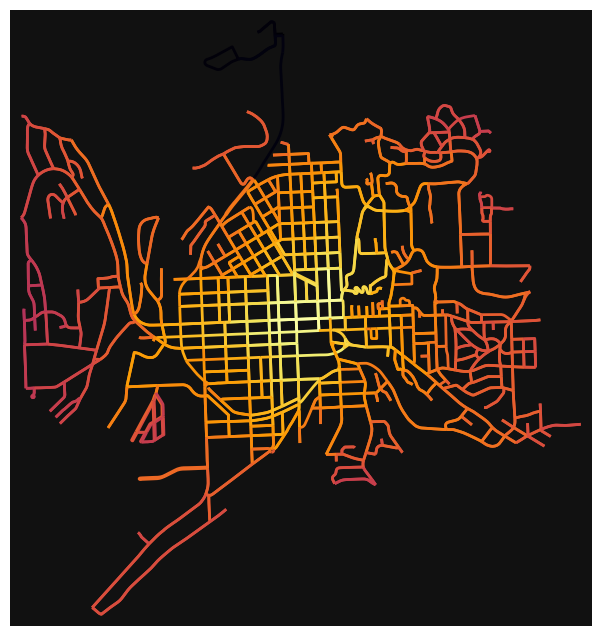

In [33]:
# color edges in original graph with centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, 'edge_centrality', cmap='inferno')
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

## Routing

In [34]:
# impute missing edge speeds then calculate edge (free-flow) travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [35]:
# get the nearest network nodes to two lat/lng points


orig = ox.nearest_nodes(G, -76.484735,42.450335)
dest = ox.nearest_nodes(G, -76.487419,42.440510)

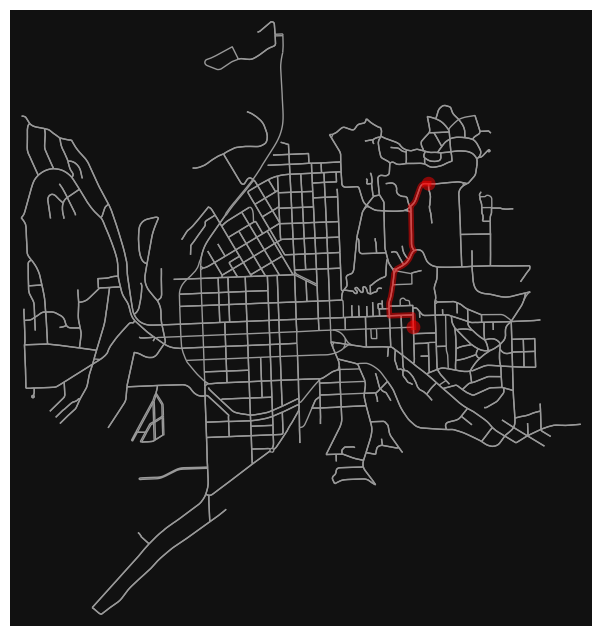

In [36]:
# find the shortest path between these nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight='travel_time')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [37]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.get_route_edge_attributes(G, route, 'length')
sum(edge_lengths)

C:\Users\desai\AppData\Local\Temp\ipykernel_31532\3453139645.py:2: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  edge_lengths = ox.utils_graph.get_route_edge_attributes(G, route, 'length')


1529.3419999999996

In [38]:
# how far is it between these two nodes as the crow flies (haversine)?
ox.distance.great_circle_vec(G.nodes[orig]['y'], G.nodes[orig]['x'],
                             G.nodes[dest]['y'], G.nodes[dest]['x'])

C:\Users\desai\AppData\Local\Temp\ipykernel_31532\1332457254.py:2: UserWarning: The `great_circle_vec` function has been renamed `great_circle`. Calling `great_circle_vec` will raise an error in a future release.
  ox.distance.great_circle_vec(G.nodes[orig]['y'], G.nodes[orig]['x'],


1180.4507452286598

## Q.3

the route is 30% longer than the euclidean distance


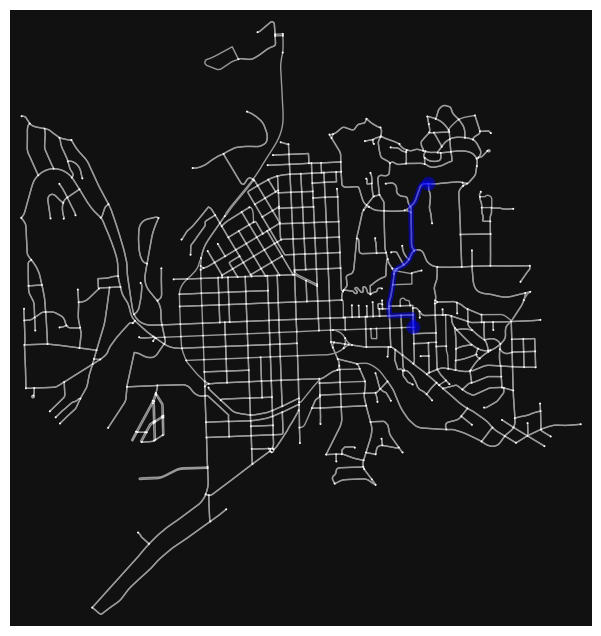

In [49]:
import math

# now it's your turn
# how circuitous is this route?


circuity = sum(edge_lengths)/(ox.distance.great_circle(G.nodes[orig]['y'], G.nodes[orig]['x'],
                             G.nodes[dest]['y'], G.nodes[dest]['x']))
print(f"the route is {math.ceil((circuity-1)*100)}% longer than the euclidean distance")

# try plotting it differently: change the colors and node/edge sizes
route = ox.shortest_path(G, orig, dest, weight='travel_time')
fig, ax = ox.plot_graph_route(G, route, node_size=2, route_color='blue')

## Get networks other ways

make queries less ambiguous to help the geocoder out, if it's not finding what you're looking for

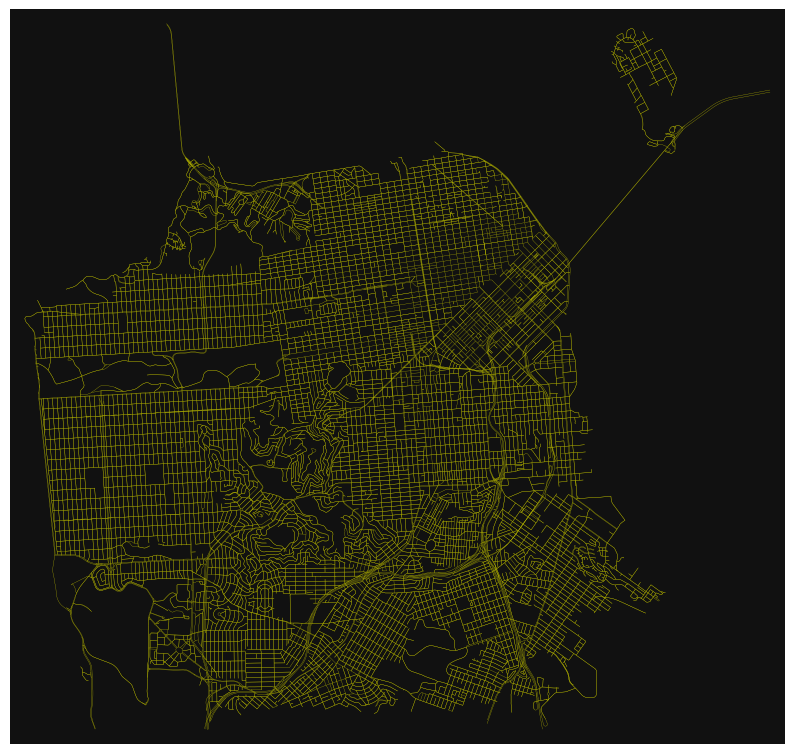

In [50]:
# you can make query an unambiguous dict to help the geocoder find it
place = {'city'   : 'San Francisco',
         'state'  : 'California',
         'country': 'USA'}
G = ox.graph_from_place(place, network_type='drive', truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color='y', edge_linewidth=0.2)

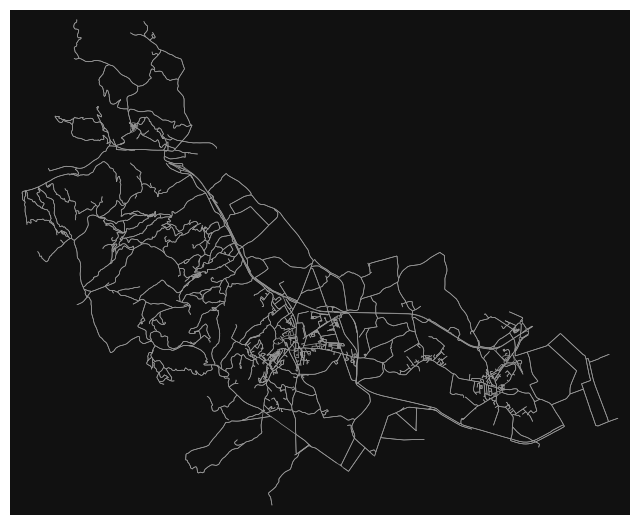

In [51]:
# you can get networks anywhere in the world
G = ox.graph_from_place('Sinalunga, Italy', network_type='all')
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

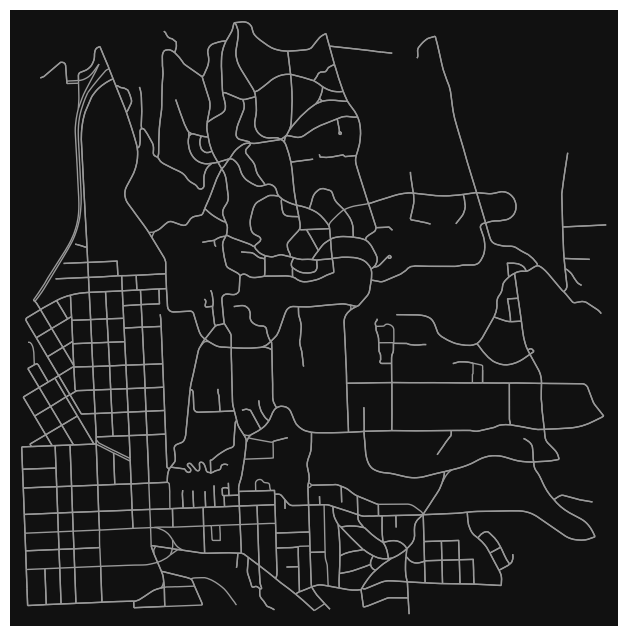

In [52]:
# or get network by address, coordinates, bounding box, or any custom polygon
# ...useful when OSM just doesn't already have a polygon for the place you want
sibley_hall = (42.450768,-76.484696)
one_mile = 1609 #meters
G = ox.graph_from_point(sibley_hall, dist=one_mile, network_type='drive')
fig, ax = ox.plot_graph(G, node_size=0)

## Q.4

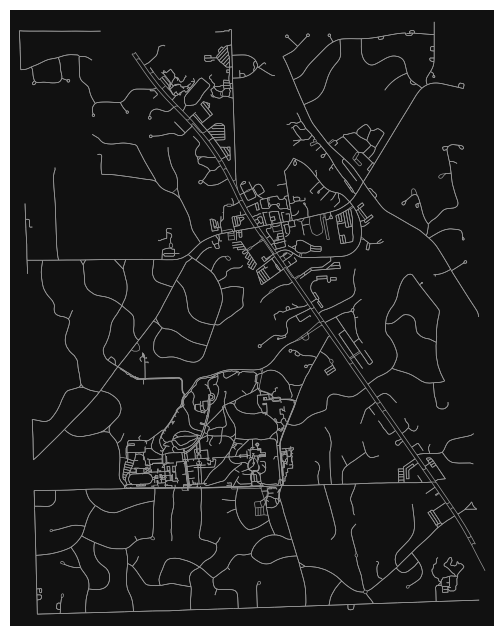

In [54]:
# now it's your turn
# create a graph of your hometown then calculate the shortest path between two points of your choice
G = ox.graph_from_place('Bloomfield Hills, Michigan, USA', network_type='all')
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\osmnx\routing.py:49: UserWarning: The attribute 'travel_time' is missing or null on some edges.
  _verify_edge_attribute(G, weight)


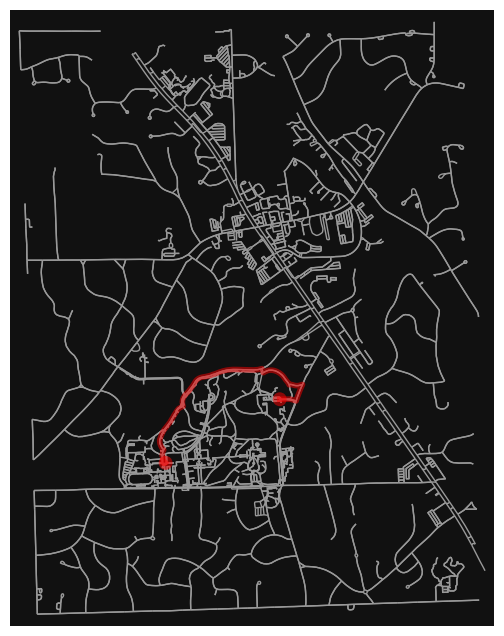

In [56]:
orig_kw = ox.nearest_nodes(G,-83.2435, 42.5728)
dest_cb = ox.nearest_nodes(G,-83.2533, 42.5688)

route = ox.shortest_path(G, orig_kw, dest_cb, weight='travel_time')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

## Get other networked infrastructure types

...like rail or electric grids or even the canals of Venice and Amsterdam, using the `custom_filter` parameter. See the Overpass Query Language documentation for query usage details.

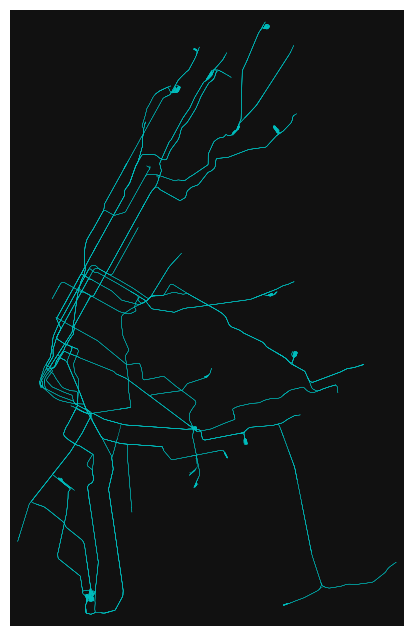

In [57]:
# get NY subway rail network
G = ox.graph_from_place('New York City, New York, USA',
                        retain_all=False, truncate_by_edge=True, simplify=True,
                        custom_filter='["railway"~"subway"]')

fig, ax = ox.plot_graph(G, node_size=0, edge_color='c', edge_linewidth=0.2)

## Get any geospatial entities' geometries and attributes

Use the `geometries` module to download entities, such as local amenities, points of interest, or building footprints, and turn them into a GeoDataFrame.

In [58]:
# get all building footprints in some neighborhood
place = 'West Village, New York, New York, USA'
tags = {'building': True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

C:\Users\desai\AppData\Local\Temp\ipykernel_31532\1232742318.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place, tags)


(2259, 109)

c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\Users\desai\m

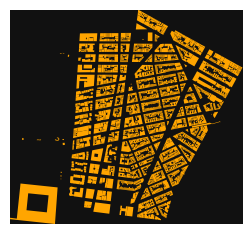

In [59]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [60]:
# get all parks and bus stops in some neighborhood
tags = {'leisure': 'park',
        'highway': 'bus_stop'}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

C:\Users\desai\AppData\Local\Temp\ipykernel_31532\3316339352.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place, tags)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoD

(52, 39)

In [61]:
# restaurants near the empire state buildings
address = '350 5th Ave, New York, NY 10001'
tags = {'amenity': 'restaurant'}
gdf = ox.geometries_from_address(address, tags=tags, dist=500)
gdf[['name', 'cuisine', 'geometry']].dropna().head()

C:\Users\desai\AppData\Local\Temp\ipykernel_31532\2066988429.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_address(address, tags=tags, dist=500)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\geopandas\geodataframe.py:1645: DeprecationWarning: Passi

name               cuisine  \
element_type osmid                                                
node         1297282272        Pando Park              american   
             1383914860       The Breslin             gastropub   
             1416478552  Murry Hill Diner                 diner   
             2081537413   Bonchon Chicken  chicken;korean;sushi   
             2081539634   LOVE Korean BBQ        chicken;korean   

                                           geometry  
element_type osmid                                   
node         1297282272  POINT (-73.98311 40.74498)  
             1383914860  POINT (-73.98812 40.74568)  
             1416478552  POINT (-73.98030 40.74590)  
             2081537413  POINT (-73.98512 40.74749)  
             2081539634  POINT (-73.98521 40.74717)

## Q.5

In [71]:
# now it's your turn
# find all the rail stations around downtown LA
# hint, the tag is railway and the value is station: https://wiki.openstreetmap.org/wiki/Tag:railway%3Dstation
import warnings
warnings.filterwarnings("ignore")

address = '550 South Hill Street, Los Angeles, CA 90013'
tags = {'railway': 'station'}
gdf = ox.geometries_from_address(address, tags=tags, dist=2000)

In [72]:
warnings.filterwarnings("ignore")
gdf

name           network  \
element_type osmid                                                         
node         268371846                 Pershing Square            LACMTA   
             268372325         7th Street/Metro Center            LACMTA   
             268547062       Los Angeles Union Station  Amtrak;Metrolink   
             1866577837                    Grand/LATTC            LACMTA   
             2199141362                           Pico            LACMTA   
             2819358596                    Hill Street               NaN   
             3297553268                   Olive Street               NaN   
             5362648027                  Union Station            LACMTA   
             5362685533                      Chinatown            LACMTA   
             5404056389                  Union Station            LACMTA   
             6135688782        Civic Center/Grand Park            LACMTA   
             6215061051  Grand Avenue Arts/Bunker Hill            LACMTA   
             6219631004              Historic Broadway            LACMTA   
             7365824840     Little Tokyo/Arts District            LACMTA   
way          1182638453                            NaN               NaN   

                                                                  operator  \
element_type osmid                                                           
node         268371846   Los Angeles County Metropolitan Transportation...   
             268372325   Los Angeles County Metropolitan Transportation...   
             268547062   Los Angeles County Metropolitan Transportation...   
             1866577837  Los Angeles County Metropolitan Transportation...   
             2199141362  Los Angeles County Metropolitan Transportation...   
             2819358596                                                NaN   
             3297553268                                                NaN   
             5362648027  Los Angeles County Metropolitan Transportation...   
             5362685533  Los Angeles County Metropolitan Transportation...   
             5404056389  Los Angeles County Metropolitan Transportation...   
             6135688782  Los Angeles County Metropolitan Transportation...   
             6215061051        Los Angeles County Transportation Authority   
             6219631004  Los Angeles County Metropolitan Transportation...   
             7365824840  Los Angeles County Metropolitan Transportation...   
way          1182638453                                                NaN   

                              public_transport  railway     station subway  \
element_type osmid                                                           
node         268371846                 station  station      subway    yes   
             268372325                 station  station  light_rail    NaN   
             268547062                 station  station         NaN    NaN   
             1866577837                station  station  light_rail    NaN   
             2199141362                station  station  light_rail    NaN   
             2819358596  stop_position;station  station   funicular    NaN   
             3297553268          stop_position  station   funicular    NaN   
             5362648027                station  station  light_rail    NaN   
             5362685533                station  station  light_rail    NaN   
             5404056389                station  station      subway    yes   
             6135688782                station  station      subway    yes   
             6215061051                station  station  light_rail    NaN   
             6219631004                station  station  light_rail    NaN   
             7365824840                station  station  light_rail    NaN   
way          1182638453                station  station      subway    yes   

                        wheelchair  wikidata  \
element_type osmid                             
node   

: 

If you're interested in more network analysis, check out: 
- [The second notebook from this series](https://github.com/gboeing/ppd599/blob/main/modules/08-urban-networks-ii/lecture.ipynb)
- Other [OSMnx case study notebooks](https://github.com/gboeing/osmnx-examples) that Geoff has created.